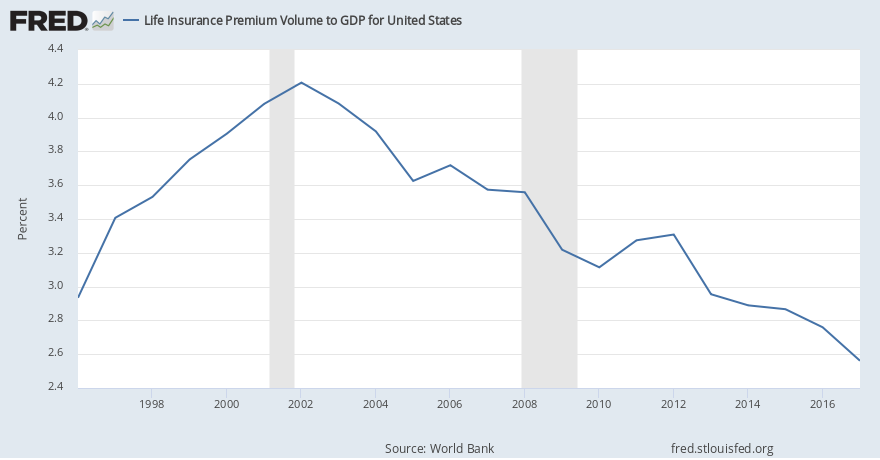

## Objective
This project was brought about as a study in Predictive Analytics. The St. Louis Federal Reserve data 
showed a possible predictive link between the economic Gross Domestic Product (GDP) and the premiums paid in the insurance industry.  

The objective of this project is to examine how well the model prediction, from certain features, help
insurance companies make decisions on their premium policies.


## Data

The - insurance.csv - data set contains 1338 observations (rows) and 7 features (columns). It can be found on Kaggle:

https://www.kaggle.com/noordeen/insurance-premium-prediction


## Features

The dataset contains the following numerical and categorical features:

   * age 
   * bmi
   * children 
   * expenses 
   * sex
   * smoker 
   * region 

that were converted into factors with numerical value.


## Evaluation
The evaluation criteria is the Coefficient of Determination, $R^2$

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

## Import Libraries

In [ ]:
#main library
import pandas as pd
import numpy as np

#data extraction, model tuning, and imputing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer

# preprocessing library
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# model library
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# evaluation metric
from sklearn.metrics import r2_score

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# suppress system warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")



## Import data

In [ ]:
#import data
data_path = '../input/insurance-premium-prediction/insurance.csv'
data = pd.read_csv(data_path)


In [ ]:
#make a copy of the data for data exploration
df = data.copy()

## Exploratory Data Analysis (EDA)

In [ ]:
#see the first 15 lines of data
print(data.head(15))


In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.describe().transpose()

In [ ]:
data.info()

In [ ]:
print(data.isnull().sum())

## Data Visualization

Identify clusters, outliers, and possible correlations between features or variables.

In [ ]:
sns.pairplot(df);

In [ ]:
sns.scatterplot(x='bmi', y='expenses', data=df, hue='expenses');

In [ ]:
sns.kdeplot(df['expenses'], shade=True, color='orangered');

detect any outliers.

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,20), color='deeppink');

analyze any skewness.

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(20,20));

In [ ]:
mask = np.tril(df.corr())
sns.heatmap(df.corr(), fmt='.1g', annot=True, cmap='cool', mask=mask);

## Data Preprocessing

### Handle missing values

In [ ]:
#check how many values are missing (NaN) before we apply the methods below 
count_nan = data.isnull().sum() # the number of missing values for every column
print(count_nan[count_nan > 0])

### Convert categorial data into numerical data

In [ ]:
#option0: 
#pandas factorizing: maps each category to a different integer = label encoder 

#create series for pandas
region = data["region"] # series 
region_encoded, region_categories = pd.factorize(region)
factor_region_mapping = dict(zip(region_categories, region_encoded)) #mapping of encoded numbers and original categories. 

print("Pandas factorize function for label encoding with series")  
print(region[:10]) #original version 
print(region_categories) #list of categories
print(region_encoded[:10]) #encoded numbers for categories 
print(factor_region_mapping) # print factor mapping

In [ ]:
#option1: 
#pandas get_dummies: maps each category to 0 (cold) or 1 (hot) = one hot encoder 

#create series for pandas
region = data["region"] # series 
region_encoded = pd.get_dummies(region, prefix='')

print("Pandas get_dummies function for one hot encoding with series")  

print(region[:10]) #original version 
print(region_encoded[:10]) #encoded numbers for categories 

In [ ]:
#option2: 
#sklearn label encoding: maps each category to a different integer

#create ndarray for label encoding (sklearn)
sex = data.iloc[:,1:2].values
smoker = data.iloc[:,4:5].values

#label encoder = le

## le for sex
le = LabelEncoder()
sex[:,0] = le.fit_transform(sex[:,0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for sex:")  
print(le_sex_mapping)
print(sex[:10])

## le for smoker
le = LabelEncoder()
smoker[:,0] = le.fit_transform(smoker[:,0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for smoker:")  
print(le_smoker_mapping)
print(smoker[:10])

In [ ]:
#option3: 
#sklearn one hot encoding: maps each category to 0 (cold) or 1 (hot) 
#one hot encoder = ohe

#create ndarray for one hot encodoing (sklearn)
region = data.iloc[:,5:6].values #ndarray

## ohe for region
ohe = OneHotEncoder() 

region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("Sklearn one hot encoder results for region:")  
print(region[:10])


## Create train and test data

In [ ]:
data.info()

In [ ]:
#putting the data together:

##take the numerical data from the original data
X_numeric = data[['age', 'bmi', 'children']].copy()

##take the encoded data and add to numerical data
X_final = pd.concat([X_numeric, region, sex, smoker], axis = 1)

#define y as being the "charges column" from the original dataset
y_final = data[['expenses']].copy()

#Test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.30, random_state = 0 )

## Feature Scaling

In [ ]:
##normalized scaler (fit transform on train, fit only on test)
n_scaler = MinMaxScaler()
X_train = n_scaler.fit_transform(X_train.astype(np.float))
X_test= n_scaler.transform(X_test.astype(np.float))


#standard scaler (fit transform on train, fit only on test)
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test= s_scaler.transform(X_test.astype(np.float))


## Modeling

### LinearRegression

In [ ]:
lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#print score
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))


### PolynomialRegression

In [ ]:
poly = PolynomialFeatures (degree = 3)
X_poly = poly.fit_transform(X_final)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y_final, test_size = 0.30, random_state = 0)

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
poly_lr = LinearRegression().fit(X_train,y_train)

y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

#print score
print('poly train score %.3f, poly test score: %.3f' % (
poly_lr.score(X_train,y_train),
poly_lr.score(X_test, y_test)))


### SupportVectorRegression

In [ ]:
svr = SVR(kernel='linear', C = 300)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.30, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

#print score
print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))

### DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(random_state=0)

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.30, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))


#fit model
dt = dt.fit(X_train,y_train.values.ravel())
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#print score
print('dt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))

### RandomForestRegression

In [ ]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.30, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

#fit model
forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#print score
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

## Comparing the best models and hyperparameter tuning

In [ ]:
#Function to print best hyperparamaters: 
def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()

#test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.30, random_state = 0 )

#standard scaler (fit transform on train, fit only on test)
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test= sc.transform(X_test.astype(np.float))

### SupportVectorRegression Hyperparameter Tuning: best parameters

In [ ]:
param_grid_svr = dict(kernel=[ 'linear', 'poly'],
                     degree=[2],
                     C=[600, 700, 800, 900],
                     epsilon=[0.0001, 0.00001, 0.000001])
svr = GridSearchCV(SVR(), param_grid=param_grid_svr, cv=5, verbose=3)

In [ ]:
#fit model
svr = svr.fit(X_train,y_train.values.ravel());

In [ ]:
#print(svr.best_estimator_.get_params())
print_best_params(svr)


In [ ]:
#print score
print('\n\nsvr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))

### DecisionTree Hyperparameter tuning: best parameters

In [ ]:
param_grid_dt = dict(min_samples_leaf=np.arange(9, 13, 1, int), 
                  max_depth = np.arange(4,7,1, int),
                  min_impurity_decrease = [0, 1, 2],
                 )

dt = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid_dt, cv=5,  verbose=3)

In [ ]:
#fit model
dt = dt.fit(X_train,y_train.values.ravel());

In [ ]:
print_best_params(dt)

In [ ]:
#print score
print('\n\ndt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))


### Random Forest hyperparameter tuning: best parameters

In [ ]:
param_grid_rf = dict(n_estimators=[20],
                     max_depth=np.arange(1, 13, 2),
                     min_samples_split=[2],
                     min_samples_leaf= np.arange(1, 15, 2, int),
                     bootstrap=[True, False],
                     oob_score=[False, ])


forest = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=param_grid_rf, cv=5, verbose=3)

In [ ]:
#fit model
forest.fit(X_train,y_train.values.ravel());

In [ ]:
print_best_params(forest)

In [ ]:
#print score
print('\n\nforest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))